In [1]:
# Documentar a parte que lida com o número de dias restantes para os vôos.

<h1 style='font-size:40px'> Flight Prices Estimator</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            This project is intended to build a flight price estimator using Python's Machine Learning resources.
        </li>
        <li> 
            The dataset includes features such as the Airline company responsible for the flight, the cities of departure and destination and the number of stops projected.
        </li>
        <li> 
            The data used was originally found on <a href='https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction'> Kaggle</a>.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Data Import & Analysis</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Most of the data in our hands is categorical. Hence, we'll need to find out a way to treat these informations so our algorithms can use them.
        </li>
    </ul>
</div>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Clean_Dataset.csv', usecols=[i for i in range(1,12)])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<h2 style='font-size:30px'> Searching for NaN's</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Fortunately, all of our columns do not present null values. We do not need to find out a way to treat such kind defect.
        </li>
    </ul>
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


<h2 style='font-size:30px'> Correcting the <em> stops</em> column</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            As <em> stops</em> refers to the quantity of stops programmed for the flights, it is reasonable to convert its values to numerical type.
        </li>
    </ul>
</div>

In [4]:
# 'two_or_more' is going to be converted as 2.
df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2}, inplace=True)
df.stops.unique()

array([0, 1, 2])

<h2 style='font-size:30px'> Numerical Values Distribution</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observing the histograms produced, it is visible that one-stop flights compose the majority of the dataset.
        </li>
        <li> 
            The <em> days_left</em> column has a well distributed data.
        </li>
        <li> 
            You can see the number of flights that have two or more stops programmed or a duration above 30 hours is proportionately low; the longest flight record cannot even be seen in the histogram! Maybe removing such cases as exceptions could enhance our models' performance.
        </li>
        <li> 
            From the DataFrame's description, the most expensive price list is above 100,000.00, which is disparate compared with the rest of the flight tickets.
        </li>
    </ul>
</div>

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,12.221021,26.004751,20889.660523
std,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.830000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


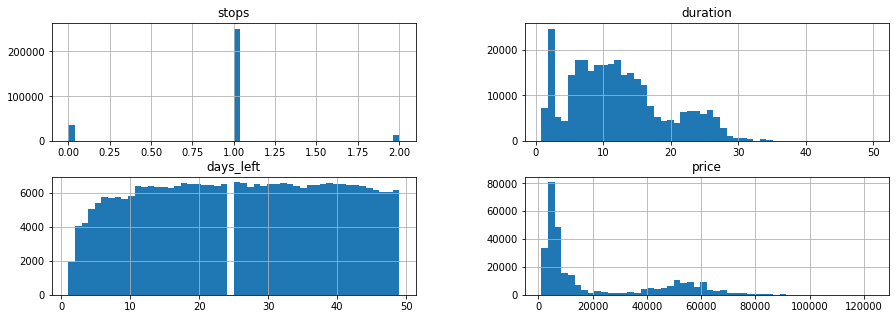

In [32]:
display(df.describe())
df.hist(figsize=(15,5), bins=50);

<h2 style='font-size:30px'> Engendering Train and Test Sets</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            In our sampling, I've chosen to maintain the proportions of the airlines from the dataset.
        </li>
    </ul>
</div>

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

for train_index, test_index in split.split(df, df.airline):
    train = df.loc[train_index]
    test = df.loc[test_index]

<h2 style='font-size:30px'> Exploratory Analysis on the Training Data</h2>

<h3 style='font-size:30px;font-style:italic'> Prices per company</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Companies might charge different prices depending on their target public. Luxury airlines are inclined to have more expensive tickets, for instance.
        </li>
    </ul>
</div>

In [38]:
# By observing the 'groupby' output, Vistara and Air_India have the most expensive flights.
train.groupby('airline')['price'].mean().sort_values(ascending=False)

airline
Vistara      30382.636317
Air_India    23467.830284
SpiceJet      6165.781107
GO_FIRST      5654.717337
Indigo        5313.265451
AirAsia       4088.926075
Name: price, dtype: float64

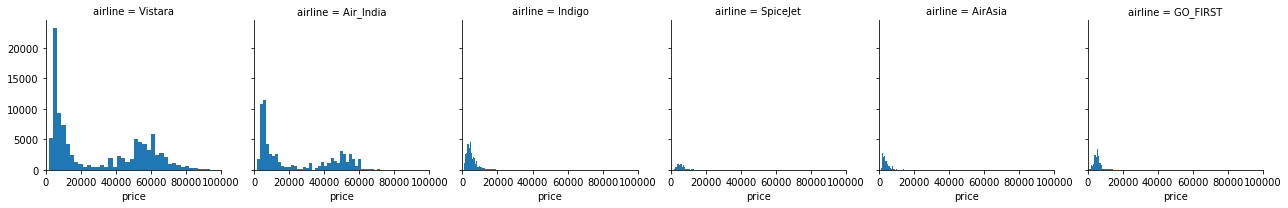

In [63]:
# Vistara and Air India also have a broader variety of prices compared to the other companies.
import seaborn as sns
import matplotlib.pyplot as plt
airline_fg = sns.FacetGrid(data=train, col='airline', xlim=[0, 100000])

airline_fg.map(plt.hist, 'price', bins=50)

<h3 style='font-size:30px;font-style:italic'> Prices per airplane</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Since we've already analyzed the prices for every airline, it would also be convenient to verify whether different aircrafts tend to have higher or lower prices.
        </li>
    </ul>
</div>

In [68]:
# And the answer is yes! Prices vary considerably depending on the airplane used.
train.groupby('flight')['price'].mean().sort_values(ascending=False)

flight
AI-433     44025.000000
UK-820     40602.498191
UK-930     40094.975684
UK-970     39429.818452
UK-996     39143.068898
               ...     
6E-7259     1105.000000
6E-7252     1105.000000
6E-7141     1105.000000
6E-7127     1105.000000
6E-557      1105.000000
Name: price, Length: 1559, dtype: float64

<h3 style='font-size:30px;font-style:italic'> Time impact on flight costs</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Let's turn our attention to the time's influence on ticket prices. If flights are scheduled to a part of the day with low demand, prices tend to be lower, for instance. 
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='arrival_time', ylabel='departure_time'>

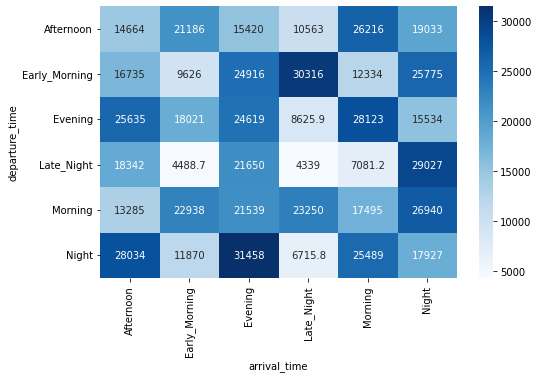

In [81]:
pivot_time = pd.pivot_table(data=train, index='departure_time', columns='arrival_time', values='price')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_time, cmap='Blues', annot=True, fmt='.5g')

<h3 style='font-size:30px;font-style:italic'> Seat type influence on ticket value</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The status of the location of your seat is an obvious aspect to regard when investigating flight prices. 
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='price', ylabel='Density'>

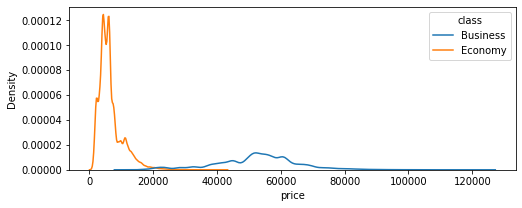

In [92]:
# The economic class tend to have prices close to 10000, whereas the business seats are usually valued between 45000 and 60000.
from seaborn import kdeplot
plt.figure(figsize=(8,3))
kdeplot(data=train, x='price', hue='class')

<h3 style='font-size:30px;font-style:italic'> Days lefting and Ticket Prices</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            
        </li>
    </ul>
</div>

Text(0.5, 1.0, 'Variation of the Average Prices Per Days Remaining')

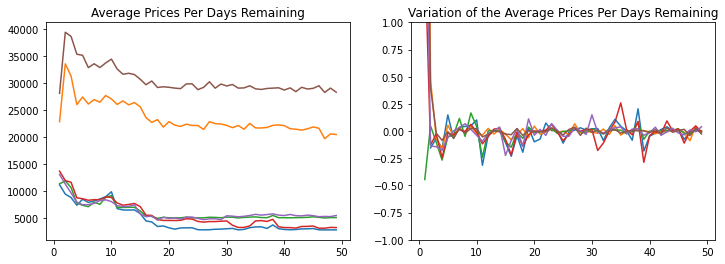

In [132]:
days_price = train.groupby(['airline','days_left'])['price'].mean()
plt.figure(figsize=(12,4))
plt.subplot(121)
for airline in days_price.index.levels[0]:
    plt.plot(days_price.xs(airline, level=0), label=airline)
plt.title('Average Prices Per Days Remaining')
    
plt.subplot(122)
days_price_derivative = days_price.pct_change()
for airline in days_price_derivative.index.levels[0]:
    plt.plot(days_price_derivative.xs(airline, level=0), label=airline)
plt.ylim([-1,1])
plt.title('Variation of the Average Prices Per Days Remaining')

In [ ]:
plt.plot(train)

<p style='color:red'> Exploração set de treino.